# Stability and Performance of Wind-Aware Path Following Guidance for Small Fixed-Wing Aircraft
Author: Thomas Stastny ([tstastny@ethz.ch](mailto:tstastny@ethz.ch))

This notebook contains scripts useful for the analysis of stability properties for a wind-aware nonlinear differential geometric path following guidance law for small fixed-wing unmanned aircraft.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import optimize
plt.rcParams.update({"text.usetex": True})

In [2]:
# functions
# ---------


# function to evaluate derivative of f w.r.t. path orientation angle lP
def eval_df(l, a):
    # inputs:
    # l         path orientation angle
    # a         wind ratio
    # outputs:
    # df/dl

    sinl = np.sin(l)
    sin2l = sinl*sinl
    cosl = np.cos(l)
    a2 = a*a
    sin4l = sin2l*sin2l
    one_m_a2sin2l = 1 - a2 * sin2l
    one_m_a2sin2l_3_2 = one_m_a2sin2l**(3/2)

    if a == 1:
        return 1 - 2 * sin2l + sin4l
    else:
        return a*(a*(a2 * sin4l - 2 * sin2l + 1) + cosl * one_m_a2sin2l_3_2) / one_m_a2sin2l_3_2


# function to evaluate f
def eval_f(l, a):
    # inputs:
    # l         path orientation angle
    # a         wind ratio
    # outputs:
    # f

    sinl = np.sin(l)
    sin2l = sinl * sinl
    cosl = np.cos(l)
    a2 = a * a
    a2sin2l = a2 * sin2l

    if a2sin2l >= 1.0:
        return 2
    else:
        return a2 * sinl * cosl / np.sqrt(1 - a2sin2l) + a * sinl


# function to evaluate critical f approximation
def eval_f_crit_analytic_approx(a):
    # inputs:
    # a         wind ratio
    # outputs:
    # fcrit

    return 2*(1 - np.sqrt(1 - a))


def eval_sum_sq_f_crit_approx_err(c, x, e):
    res = e + x.transpose().dot(c)
    return res.dot(res)

In [3]:
# allocate arrays
# ---------------

len_data = 501

wrd1 = np.linspace(0, 0.995, len_data - 100)
wrd2 = np.linspace(0.995, 1, 101)
wind_ratio_data = np.concatenate((wrd1[:len_data - 101], wrd2))

path_ori_crit_num_sol = np.zeros(len_data)      # numerical solution of critical path orientation per wind ratio

f_crit_analytic_approx = np.zeros(len_data)     # approximation of critical f value per wind ratio
f_crit_approx2_sol = np.zeros(len_data)         # critical f value per wind ratio
f_crit_num_sol = np.zeros(len_data)             # numerical solution of critical f value per wind ratio

## Solutions and Approximations
### Numerically solve for critical path orientation ${\lambda_P}^\star$
numerically solve for path orientation l at given wind ratio a which maximizes f
fun = df/dl(l,a)
args = (a)

In [4]:
a_solution_failed = False
for i in range(len_data):
    sol = optimize.root(eval_df, np.pi/2*0.99, args=(wind_ratio_data[i],))
    path_ori_crit_num_sol[i] = sol.x
    print(f'{wind_ratio_data[i]:.2f}' + ':' + str(sol.success) + '; sol = ' + str(sol.x))
    if not sol.success:
        a_solution_failed = True

if a_solution_failed:
    print('ERROR: One ore more numerical solutions failed, check above output^')

# df(a=0) = 0, define a crit orientation at 0 which follows the trend of the other solutions
path_ori_crit_num_sol[0] = np.pi/2

0.00:True; sol = [1.55508836]
0.00:True; sol = [1.56830885]
0.00:True; sol = [1.56582149]
0.01:True; sol = [1.56333438]
0.01:True; sol = [1.56084764]
0.01:True; sol = [1.55836139]
0.01:True; sol = [1.55587576]
0.02:True; sol = [1.55339086]
0.02:True; sol = [1.55090682]
0.02:True; sol = [1.54842377]
0.02:True; sol = [1.54594182]
0.03:True; sol = [1.54346109]
0.03:True; sol = [1.54098171]
0.03:True; sol = [1.5385038]
0.03:True; sol = [1.53602748]
0.04:True; sol = [1.53355286]
0.04:True; sol = [1.53108007]
0.04:True; sol = [1.52860922]
0.04:True; sol = [1.52614044]
0.05:True; sol = [1.52367384]
0.05:True; sol = [1.52120954]
0.05:True; sol = [1.51874765]
0.05:True; sol = [1.51628829]
0.06:True; sol = [1.51383158]
0.06:True; sol = [1.51137763]
0.06:True; sol = [1.50892655]
0.06:True; sol = [1.50647846]
0.07:True; sol = [1.50403346]
0.07:True; sol = [1.50159167]
0.07:True; sol = [1.4991532]
0.07:True; sol = [1.49671816]
0.08:True; sol = [1.49428665]
0.08:True; sol = [1.49185879]
0.08:True; s

1.00:True; sol = [1.39488069]
1.00:True; sol = [1.39691672]
1.00:True; sol = [1.3990343]
1.00:True; sol = [1.40124116]
1.00:True; sol = [1.40354621]
1.00:True; sol = [1.40595989]
1.00:True; sol = [1.40849443]
1.00:True; sol = [1.41116443]
1.00:True; sol = [1.41398739]
1.00:True; sol = [1.4169847]
1.00:True; sol = [1.42018278]
1.00:True; sol = [1.42361497]
1.00:True; sol = [1.42732418]
1.00:True; sol = [1.4313671]
1.00:True; sol = [1.43582101]
1.00:True; sol = [1.44079562]
1.00:True; sol = [1.44645492]
1.00:True; sol = [1.45306207]
1.00:True; sol = [1.46108484]
1.00:True; sol = [1.47150262]
1.00:True; sol = [1.487127]
1.00:True; sol = [1.57072213]


### Numerical Solution $f^\star$

In [5]:
for i in range(len_data):
    f_crit_num_sol[i] = eval_f(path_ori_crit_num_sol[i], wind_ratio_data[i])

### Approximation 1 $\tilde{f}_1^\star$ 

In [6]:
for i in range(len_data):
    f_crit_analytic_approx[i] = eval_f_crit_analytic_approx(wind_ratio_data[i])

f_crit_analytic_approx_err = f_crit_analytic_approx - f_crit_num_sol

### Approximation 2 $\tilde{f}_2^\star$ 
Fit a 3rd order polynomial $p^{(3)} = \left({\mathbf{\alpha}_W}^{\circ 3}, {\mathbf{\alpha}_W}^{\circ 2}, {\mathbf{\alpha}_W}^{\circ 1}, {\mathbf{\alpha}_W}^{\circ 0}\right) \mathbf{c}$, where $\mathbf{c}=\left(c_3,c_2,c_1,c_0\right)^T$ are the polynomial coefficients, to our analytic approximation error $\tilde{f}_{1,\text{err}}^\star$.

$\begin{equation}
\min_{\mathbf{c}} \left(\tilde{f}^\star_{1,\text{err}} + p^{(3)}\left(\mathbf{c}, \mathbf{\alpha}_W\right)\right)^T \left(\tilde{f}^\star_{1,\text{err}} + p^{(3)}\left(\mathbf{c},\mathbf{\alpha}_W\right)\right)
\end{equation}$

$\begin{align}
&s.t. & p^{(3)}\left(\mathbf{c}, 0\right) &= 0 \\
& & p^{(3)}\left(\mathbf{c}, 1\right) &= 0
\end{align}$

NOTE: (1) implies c0 = 0, therefore c0 and (1) are omitted from the optimization problem

In [7]:
wr321 = np.array([wind_ratio_data**3, wind_ratio_data**2, wind_ratio_data])
c0 = -np.array([-0.32313744, 0.31651312, 0.00662432])*0.55                          # coefficients initial guess
cons = ({'type': 'eq', 'fun': lambda c, x: x[:, -1].dot(c), 'args': (wr321,)})      # equality constraint (2)

# optimize
c_sol = optimize.minimize(eval_sum_sq_f_crit_approx_err, c0, args=(wr321, f_crit_analytic_approx_err), constraints=cons)
print(c_sol)

# calculate the polynomial result and add it to the analytic approximation
poly_fun = np.poly1d(np.concatenate((c_sol.x, np.array([0]))))
f_crit_analytic_poly_approx = f_crit_analytic_approx + poly_fun(wind_ratio_data)
f_crit_analytic_poly_approx_err = f_crit_analytic_poly_approx - f_crit_num_sol

     fun: 5.622576748976453e-05
     jac: array([0.07341382, 0.07341382, 0.07341382])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 0.1705916 , -0.15937888, -0.01121272])


## Plotting
Here we plot the numerical solution for the critical path orientation angle ${\lambda_P}^\star$ as well as the numerical solution and approximations of the critical function value $f^\star$ determined above.

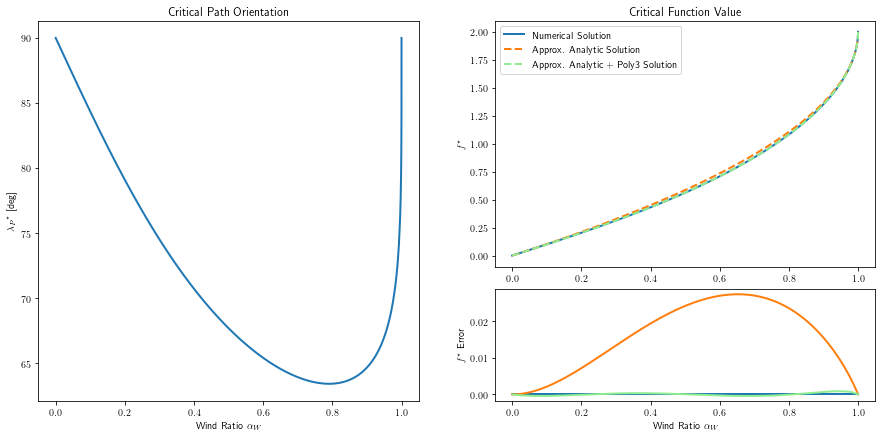

In [8]:
plot_lw = 2

fig = plt.figure(figsize=(15, 7))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

ax1 = fig.add_subplot(spec[:, 0])
ax2 = fig.add_subplot(spec[:2, 1])
ax3 = fig.add_subplot(spec[2, 1])

ax1.plot(wind_ratio_data, np.rad2deg(path_ori_crit_num_sol), linewidth=plot_lw, color='tab:blue')
ax1.set_ylabel(r'${\lambda_P}^\star$ [deg]')
ax1.set_title(r'Critical Path Orientation')
ax1.set_xlabel(r'Wind Ratio $\alpha_W$')

ax2.plot(wind_ratio_data, f_crit_num_sol, linewidth=plot_lw, color='tab:blue', label=r'Numerical Solution')
ax2.plot(wind_ratio_data, f_crit_analytic_approx, '--', linewidth=plot_lw, color='tab:orange', label=r'Approx. Analytic Solution')
ax2.plot(wind_ratio_data, f_crit_analytic_poly_approx, '--', linewidth=plot_lw, color='lightgreen', label=r'Approx. Analytic + Poly3 Solution')
ax2.set_ylabel(r'$f^\star$')
ax2.set_title(r'Critical Function Value')
ax2.legend(loc="upper left")

ax3.plot([wind_ratio_data[i] for i in [0, -1]], [0, 0], linewidth=plot_lw, color='tab:blue')
ax3.plot(wind_ratio_data, f_crit_analytic_approx_err, linewidth=plot_lw, color='tab:orange')
ax3.plot(wind_ratio_data, f_crit_analytic_poly_approx_err, linewidth=plot_lw, color='lightgreen')
ax3.set_ylabel(r'$f^\star$ Error')
ax3.set_xlabel(r'Wind Ratio $\alpha_W$')

plt.show()
